# 01 Data Cleaning and EDA
## Project: Road Surface & Vehicle Sensor Analysis
### Contributors: Issa Ennab, Ajmal Jalal, Mani Katuri

This project explores road conditions and vehicle behavior prediction using machine learning techniques. The dataset contains sensor readings from multiple vehicles on different road types (asphalt, cobblestone, dirt) and includes GPS, accelerometer (MPU), and environmental data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tabulate
import os
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

## 📥 Loading the Dataset

Source: Kaggle Dataset
https://www.kaggle.com/code/jefmenegazzo/pvs-data-exploration

The dataset comprises **nine experiments**, each representing a **vehicle-driven route on mixed road types** (asphalt, cobblestone, dirt). The experiments were conducted using **three different vehicles** across **three scenarios**:

| Experiment | Vehicle              | Scenario  |
|------------|-----------------------|------------|
| PVS 1-3    | Volkswagen Saveiro    | Scenario 1, 2, 3 |
| PVS 4-6    | Fiat Bravo            | Scenario 1, 2, 3 |
| PVS 7-9    | Fiat Palio            | Scenario 1, 2, 3 |

Each experiment contains sensor data (accelerometers, gyroscopes, magnetometers), GPS readings, and labeled road conditions.  
To **facilitate future analysis and comparisons**, we **merged all experiments into a single master dataset**. During this process, we **appended three additional fields**:

- `experiment_id`: Identifies the source experiment (e.g., PVS 1, PVS 2…)
- `vehicle`: Identifies the vehicle used (e.g., Volkswagen Saveiro)
- `scenario`: Denotes the scenario number (e.g., Scenario 1)

This allows us to **filter by vehicle, scenario, or experiment** later for **comparative analysis** or **model evaluation**.

---

The **merged dataset** was **saved as `master_dataset.csv`** for future use.

In [39]:
# Base directory containing the PVS folders
base_dir = 'dataset/'

# Vehicle and scenario mapping based on the provided table
experiment_metadata = {
    'PVS 1': {'vehicle': 'Volkswagen Saveiro', 'scenario': 'Scenario 1'},
    'PVS 2': {'vehicle': 'Volkswagen Saveiro', 'scenario': 'Scenario 2'},
    'PVS 3': {'vehicle': 'Volkswagen Saveiro', 'scenario': 'Scenario 3'},
    'PVS 4': {'vehicle': 'Fiat Bravo', 'scenario': 'Scenario 1'},
    'PVS 5': {'vehicle': 'Fiat Bravo', 'scenario': 'Scenario 2'},
    'PVS 6': {'vehicle': 'Fiat Bravo', 'scenario': 'Scenario 3'},
    'PVS 7': {'vehicle': 'Fiat Palio', 'scenario': 'Scenario 1'},
    'PVS 8': {'vehicle': 'Fiat Palio', 'scenario': 'Scenario 2'},
    'PVS 9': {'vehicle': 'Fiat Palio', 'scenario': 'Scenario 3'},
}

# Empty list to collect dataframes
all_dataframes = []

In [40]:
# mpu_left = pd.read_csv('dataset/PVS 1/dataset_mpu_left.csv')

# Iterate over each PVS folder
for pvs_id, meta in experiment_metadata.items():
    folder_path = os.path.join(base_dir, pvs_id)

    # Load the relevant CSVs
    mpu_left = pd.read_csv(os.path.join(folder_path, 'dataset_mpu_left.csv'))
    mpu_right = pd.read_csv(os.path.join(folder_path, 'dataset_mpu_right.csv'))
    gps = pd.read_csv(os.path.join(folder_path, 'dataset_gps.csv'))
    labels = pd.read_csv(os.path.join(folder_path, 'dataset_labels.csv'))

    # Merge MPU Left and MPU Right on timestamp
    mpu_combined = pd.merge(mpu_left, mpu_right, on='timestamp', suffixes=('_left', '_right'))

    # Merge GPS with combined MPU
    merged_data = pd.merge(mpu_combined, gps, on='timestamp', how='left')

    # Merge with Labels
    merged_data = pd.merge(merged_data, labels, left_index=True, right_index=True, how='left')

    # Add experiment-level metadata
    merged_data['experiment_id'] = pvs_id
    merged_data['vehicle'] = meta['vehicle']
    merged_data['scenario'] = meta['scenario']

    # Collect dataframe
    all_dataframes.append(merged_data)

# Concatenate all experiment data into a master dataframe
master_df = pd.concat(all_dataframes, ignore_index=True)

### 🧾 Initial Dataset Summary

We analyzed the combined dataset, resulting in:
- 1,080,905 rows
- 91 features

In [41]:
# Save as CSV for future use
master_df.to_csv('dataset/master_dataset.csv', index=False)

# Display a summary
print(f"Final Dataset Shape: {master_df.shape}")
print(master_df.head())

Final Dataset Shape: (1080905, 91)
      timestamp  acc_x_dashboard_left  acc_y_dashboard_left  \
0  1.577219e+09              0.365116              0.167893   
1  1.577219e+09              0.392649              0.176273   
2  1.577219e+09              0.409408              0.181062   
3  1.577219e+09              0.371101              0.164302   
4  1.577219e+09              0.390255              0.159514   

   acc_z_dashboard_left  acc_x_above_suspension_left  \
0              9.793961                     0.327626   
1              9.771216                     0.381496   
2              9.732909                     0.283333   
3              9.749668                     0.314458   
4              9.869378                     0.344385   

   acc_y_above_suspension_left  acc_z_above_suspension_left  \
0                     0.172733                     9.781861   
1                     0.189492                     9.699261   
2                     0.182310                     9.807000 

## 🧾 Dataset Summary

To better understand the structure and quality of the dataset used in this project, we generated a summary table highlighting key characteristics of each feature. This summary provides insights into the data types, non-null counts, and a quick overview of missing values, aiding in the data cleaning and preparation process.

In [42]:
# Prepare summary table
summary_data = [{
    'Dataset Name': 'master_dataset',
    'Number of Rows': master_df.shape[0],
    'Number of Columns': master_df.shape[1],
    'Duplicates': master_df.duplicated().sum(),
    'Missing Values': master_df.isnull().sum().sum(),
    'Sample Columns': ', '.join(master_df.columns[:5]) + ('...' if len(master_df.columns) > 5 else '')
}]

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary as a clean DataFrame
display(summary_df)

,Dataset Name,Number of Rows,Number of Columns,Duplicates,Missing Values,Sample Columns
0,master_dataset,1080905,91,0,20443399,"timestamp, acc_x_dashboard_left, acc_y_dashboa..."


In [43]:
summary_df.to_csv('dataset/summary_master_dataset.csv', index=False)
# print(summary_df.to_markdown())

## Visualize Missing Values

We plotted the missing values, revealing that certain columns (latitude, longitude, accuracy, and GPS-related) had over 99% missing values. This led us to evaluate their relevance.

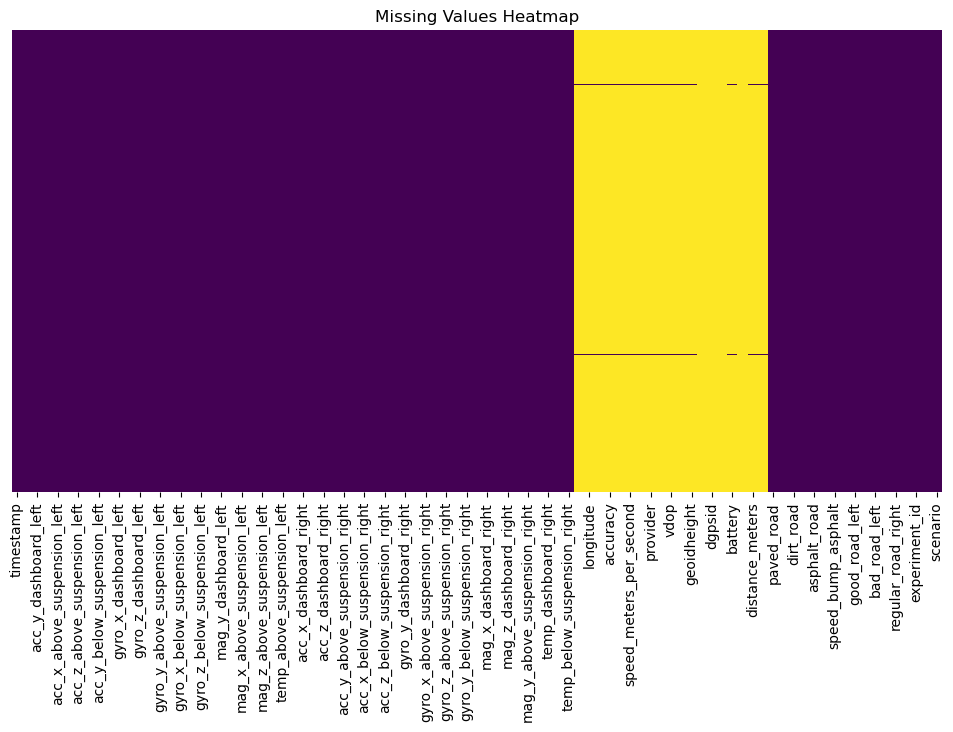

In [44]:
plt.figure(figsize=(12, 6))
sns.heatmap(master_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [45]:
# Count non-null values for latitude, longitude, and accuracy
non_null_counts = master_df[['latitude', 'longitude', 'accuracy']].notnull().sum()
print(non_null_counts)

latitude     6254
longitude    6254
accuracy     6254
dtype: int64


## 🧹 Data Cleaning Process

As part of the data preparation process, we carefully examined the dataset for **missing values, duplicates, and irrelevant features**. Our approach was guided by both **statistical analysis** and **domain understanding**. Key decisions and steps are outlined below:

### 1. Handling Missing Values
Upon visualizing the missing values using a heatmap, we observed that several GPS-related columns (e.g., `latitude`, `longitude`, `accuracy`) contained **sparse data** (less than 1% non-null records). Such sparse features hold **little predictive value** and could introduce noise into the models.

- **Non-null Counts:**
  - `latitude`: 6254 (0.58%)
  - `longitude`: 6254 (0.58%)
  - `accuracy`: 6254 (0.58%)

These columns, along with other irrelevant fields, were **dropped** from the dataset.

### 2. Columns Removed:
| Column Name       | Reason for Removal                                    |
|-------------------|--------------------------------------------------------|
| `latitude`        | Sparse data (0.58%), irrelevant for vibration-based prediction |
| `longitude`       | Same as above                                          |
| `accuracy`        | Sparse data, related to GPS quality, not road condition |
| `bearing`         | Mostly null, GPS directional data, not required        |
| `geoidheight`     | Elevation reference, not predictive in our context     |
| `ageofdgpsdata`   | Sparse, not relevant                                   |
| `dgpsid`          | Sparse, not relevant                                   |
| `provider`        | Text data, carrier info, irrelevant                    |
| `annotation`      | Mostly null, likely for labeling, not predictive       |
| `battery`         | Battery level, not influencing road vibrations         |

### 3. Final Cleaned Dataset:
After removing the above columns, our **final dataset** consists of **81 features and 1,080,905 records**.

---

### 📊 Visual Summary
A heatmap of missing values confirmed that the removed columns had **large gaps**, validating our decision to **drop them**.


In [46]:
# Columns to remove based on missing values and irrelevance
cleaned_df = master_df.copy()
columns_to_drop = [
    'latitude', 'longitude', 'accuracy', 'bearing', 'geoidheight',
    'ageofdgpsdata', 'dgpsid', 'provider', 'annotation', 'battery'
]

# Drop the columns from the master dataframe
cleaned_df.drop(columns=columns_to_drop, inplace=True)

# Save the cleaned dataset
cleaned_df.to_csv('dataset/cleaned_master_dataset.csv', index=False)

# Confirm the changes
print(f"Final Dataset Shape After Dropping Columns: {cleaned_df.shape}")

Final Dataset Shape After Dropping Columns: (1080905, 81)
